### 二阶微分方程的有限差分法(Python)
考虑如下的二阶微分方程
$$ -U''(x) = f(x) = 9sin(3x)-6x,  x\in(0, \pi) $$
给定如下的边值条件
$$U(0)=0, U(\pi)=\pi^3$$
我们可以得到解析解为：
$$ U(x)=sin(3x)+x^3 $$
在区间$[0, \pi]$离散，可以得到如下的二阶中心差分格式

$$ -\frac{U_{i-1}-2U_i + U_{i+1}}{h^2} = f_i $$

将上式写成矩阵的形式，$AU=F$, 其中 $A$ 为三对角占优矩阵，因此这个 $AU=F$ 这个方程组可以通过追赶法求解。
追赶法英文文献中常被称为 Thomas' algorithm，详见维基百科 [Tridiagonal matrix algorithm](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

首先，用 Python 中的 numpy 实现 Thomas 算法 

In [2]:
def Thomas(La, Mb, Uc, b):
    """
    Arguments:
        La -- [lower item for tri-diagonal matrix]
        Mb -- [mian item for tri-diagonal matrix]
        Uc -- [upper item for tri-diagonal matrix]
        b -- [AX = b, where A is the tri-diagonal matrix]
    """
    n = len(Mb)
    Uc[0] = Uc[0] / Mb[0]
    for i in range(1, n-1):
        Uc[i] = Uc[i] / (Mb[i] - La[i - 1] * Uc[i - 1])
    b[0] = b[0] / Mb[0]
    for i in range(1, n):
        b[i] = (b[i] - La[i-1]*b[i-1]) \
        / (Mb[i] - La[i-1] * Uc[i-1])
    ls = list(range(n-1))[::-1]
#     print(b)
    for i in ls:
        b[i] = b[i] - Uc[i]*b[i+1]
    return b

踩坑1：

In [3]:
def Exact(X):
    return np.sin(3*X) + np.power(X,3)

def f(X):
    return 9.0*np.sin(3.*X) - 6.*(X)

def FDMode(n):
    Xa = 0
    Xb = np.pi
    U0 = 0
    Upi = np.pi**3
    h = np.array((Xb-Xa)/n)
    h2 = h**2
    N = n+1 # all point
    U_numerical = np.zeros((N,1))
    U_numerical[0] = U0
    U_numerical[-1] = Upi
    X = np.linspace(Xa,Xb,N)
    La = np.zeros((n-2,))
    Mb = np.zeros((n-1,))
    Uc = np.zeros((n-2,))
    La[:] = -1.0/h2
    Mb[:] = 2.0/h2
    Uc[:] = -1.0/h2
    b = f(X)[1:-1]

    b[0] = b[0] + U0
    b[-1] = b[-1] + Upi/h2

    res = Thomas(La,Mb,Uc,b)
    exact = Exact(X)
    # errors 
    norm_max = np.max(np.abs(exact[1:-1]-res))
    norm_2 = np.sqrt(np.sum(np.abs(exact[1:-1]-res)**2))
#     print(n,norm_max, norm_2)
    return norm_max, norm_2

对不同的网格剖分数下二范数误差和最大范数误差进行绘图对比

norm_2 [0.17313691 0.05917509 0.03201182 0.02074735 0.01483074 0.011276
 0.00894525 0.00732002 0.00613367 0.00523647]
norm_max [0.07742918 0.01871281 0.00826542 0.00463925 0.00296615 0.00205871
 0.00151202 0.0011574  0.00091435 0.00074055]


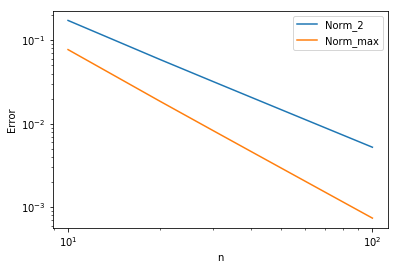

In [4]:
nlist = list(range(10,101,10))
NN = len(nlist)
Norm2 = np.zeros((NN,))
NormMax = np.zeros((NN,))
for i in range(NN):
    norm_max, norm_2 = FDMode(nlist[i])
    Norm2[i] = norm_2
    NormMax[i] = norm_max

print("norm_2",Norm2)
print("norm_max",NormMax)
fig, ax = plt.subplots()
ax.loglog(nlist,Norm2, basex=10, basey=10)
ax.loglog(nlist,NormMax, basex=10, basey=10)
ax.set_xlabel('n', fontsize=10)
ax.set_ylabel('Error', fontsize=10)
ax.legend(["Norm_2", "Norm_max"])
plt.show()
